# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [16]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13234 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


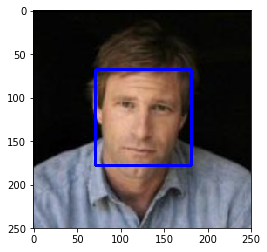

In [17]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [18]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

human_files: 96%

dog_files: 18%

In [19]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_true_positive_count = 0
for human_image in human_files_short:
    if face_detector(human_image):
        human_true_positive_count += 1

human_false_positive_count = 0
for dog_image in dog_files_short:
    if face_detector(dog_image):
        human_false_positive_count += 1

print("human TP: {}%".format(human_true_positive_count))
print("human FP: {}%".format(human_false_positive_count))

human TP: 96%
human FP: 18%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [20]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [21]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    print("Cuda available: Using GPU")
else:
    print("No cuda... Using CPU")
    
VGG16

Cuda available: Using GPU


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [22]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([
                    transforms.Resize((224, 224)),
                    transforms.ToTensor(),
                    transforms.Normalize((0.485, 0.456, 0.406), 
                                         (0.229, 0.224, 0.225))])
    img = in_transform(img)
    img = img.view(1, 3, 224, 224)
    
    VGG16.eval()
    if use_cuda:
        img = img.cuda()
    output = VGG16.forward(img)
    output = output.view(1000)
    return output.argmax().item() # predicted class index

# VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [23]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    object_index = VGG16_predict(img_path)
    
    return 151 <= object_index and object_index <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

human_files_short: 18%

dog_files_short: 96%

In [24]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
dog_false_positive_count = 0
for human_image in human_files_short:
    if dog_detector(human_image):
        dog_false_positive_count += 1

dog_true_positive_count = 0
for dog_image in dog_files_short:
    if dog_detector(dog_image):
        dog_true_positive_count += 1

print("dog TP: {}%".format(human_true_positive_count))
print("dog FP: {}%".format(human_false_positive_count))

dog TP: 96%
dog FP: 18%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [25]:
import torch
import os
from torchvision import datasets
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt                        
from matplotlib.pyplot import show
from PIL import Image

# The worker function needs to be in another python file to work with jupyter notebooks.
# See this thread: https://stackoverflow.com/questions/48915440/pandas-multiprocessing-cant-get-attribute-function-on-main
from worker import worker_init_fn

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# It seems that some images are truncated...
# https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_folder = 'dogImages/train'
valid_folder = 'dogImages/valid'
test_folder = 'dogImages/test'

mean = [0.5, 0.5, 0.5] #mean=[0.485, 0.456, 0.406], 
std = [0.5, 0.5, 0.5]  #std=[0.229, 0.224, 0.225])])
train_transform = \
    transforms.Compose([# Size expected by VGG19
                        # Keep the aspect ratio 
                        transforms.Resize(224),
                        # Make sure the image is square
                        transforms.CenterCrop(224),
                        # the dogs are all looking at the camera.
                        # They don't have the head upside down in the DB.
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(10),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=mean,
                                             std=std)])

predict_transform = \
    transforms.Compose([# Size expected by VGG19
                        # Make sure the image is square
                        transforms.Resize(224),
                        # Make sure the image is square
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=mean, std=std)])

train_data = datasets.ImageFolder(train_folder, transform=train_transform)
valid_data = datasets.ImageFolder(valid_folder, transform=predict_transform)
test_data = datasets.ImageFolder(test_folder, transform=predict_transform)

# A subset of the train data to train faster on CPU to check 
# if it converges fast enough
train_subset_size = 1
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(train_subset_size * num_train))
train_idx = indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
print(f"train on {len(train_idx)} samples from {num_train}")

valid_subset_size = 1
num_valid = len(valid_data)
indices = list(range(num_valid))
np.random.shuffle(indices)
split = int(np.floor(valid_subset_size * num_valid))
valid_idx = indices[:split]
valid_sampler = SubsetRandomSampler(valid_idx)
print(f"validate on {len(valid_idx)} samples from {num_valid}")


num_workers = 6
classes_count = 133
batch_size = 32 #classes_count

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, sampler=train_sampler,
                                           worker_init_fn=worker_init_fn)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, sampler=valid_sampler,
                                           worker_init_fn=worker_init_fn)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers,
                                          worker_init_fn=worker_init_fn)

loaders_scratch = { 
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
    }


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        #mean = np.array([0.485, 0.456, 0.406])
        #std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    show(block=False)

    return ax

#img = Image.open('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg').convert('RGB')
#img = train_transform(img)

# print(torch.max(img))
#print(torch.min(img))
#print(img)
#print(img.shape)

#imshow(img, normalize=False)

#data_iter = iter(train_loader)
#images, _ = data_iter.next()
#imshow(images[0], normalize=True)


train on 6680 samples from 6680
validate on 835 samples from 835


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

Resize: 
* First I do a resize and keep the aspect ratio not to have distorted images. And then I apply a crop to fit the expected image size for VGG.

Augmentation (on training set only):
* Yes I apply a rotation to be rotation agnostic. Though the max rotation angle is not so big because the examples in the DB have mainly a more or less straight face (I didn't see dogs laying on the back and then, having the head upside down)
* I also apply a random horizontal flip (and no vertical flip) for the same reasons

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [26]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN

        # Input image info
        input_image_channels = 3
        input_image_size = 224

        # Convolution layers
        # 8, 8, 16, 16, 180:   Epoch 19 Valid:3.939886 Test:???????? 10%
        # 8, 8, 16, 32, 180:   Epoch 20 Valid:3.954070 Test:3.908599 12% (105/836)
        # 8, 16, 32, 32, 180:  Epoch 17 Valid:3.960099 Test:3.960773 9% (79/836) 
        # 16, 16, 32, 32, 180: Epoch 15 Valid:3.883010 Test:3.895172 10% (89/836)
        # 8, 8, 32, 32, 180:   Epoch 21 Valid:3.877023 Test:3.870964 11% (96/836)
        self.conv1 = nn.Conv2d(input_image_channels, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(self.conv1.out_channels, 8, 3, padding=1)
        self.conv3 = nn.Conv2d(self.conv2.out_channels, 16, 3, padding=1)
        self.conv4 = nn.Conv2d(self.conv3.out_channels, 32, 3, padding=1)
            
        # Downsampling
        self.pool = nn.MaxPool2d(2, 2) # Divide image by 2 in w and h
        
        # Dropout to avoid overfitting
        self.dropout = nn.Dropout(0.25)
        
        # Last layer info
        last_conv = self.conv4
        conv_count = 4
        last_conv_image_size = int(input_image_size / (self.pool.stride ** conv_count))
                
        fc1_input = int(last_conv.out_channels * last_conv_image_size * last_conv_image_size)
        classes_count = 133
        hidden_layer_size = 180 #227 #322 # 512 # 133 #int(((last_conv_image_size * last_conv_image_size) + classes_count) / 2)
        
        self.fc1 = nn.Linear(fc1_input, hidden_layer_size)
        self.fc2 = nn.Linear(hidden_layer_size, classes_count)

        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))

        # flatten the image
        x = x.view(-1, self.fc1.in_features)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)

        return x


#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

At the beginning I took a similar model as the one from the Cifar notebook exercise but it was not converging enough and was overfitting.<br />
Then after a lot of trial and errors, I took this methodology:
* Always having a pool per convolutional filter (subsampling) and a dropout per layer (to help avoiding overfitting)
* Start with only one simple filter (3x8 with a 3x3 kernel) and 3 Linear layers. The hidden layer was set to the number of classes.
* Add a filter if the training loss was not good enough (I went to max 4 filters)
* Dichotomically changed the hidden layer nodes number between 133 and mean of fc1 input and the number of classes. This heuristic didn't work, it was producing Out Of Memory problems.
* Dichotomically changed the hidden layer nodes number between 133 and 512. When it was overfitting too quickly, I lowered the number of nodes.

Things I did to speed up the training:
* For really quick tests, I tried on subsets of the validation DB.
* Set the number of workers to 6 (to avoid the truncated image problem, I had to add an init function that had to be outside of the jupyter notebook, otherwise it would just mysteriously fail...)
* Early stopping of the training: once the model starts overfitting (low training loss and high validation loss), I stop the training.

Among the things that I tried but didn't succeed:
* Batch normalization as it was advised in the student hub. There might be something that I did wrong here...
* Tweaking the learning rate. At the end, I sticked it to 0.1 and rather tweaked the model to reach a reasonable accuracy
* Changing the initial weights to random but it didn't bring significant changes
* Changing the momentum of the SGD optimizer but it didn't bring significant changes
* Try with RMSprop instead of SGD but it didn't bring significant changes

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [27]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# From here (https://shaoanlu.wordpress.com/2017/05/29/sgd-all-which-one-is-the-best-optimizer-dogs-vs-cats-toy-experiment/)
# and there (https://arxiv.org/abs/1705.08292), SGD seems to better generalize even
# though the training accuracy is less good than Adam
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1) #, momentum=0.8)
#optimizer_scratch = optim.RMSprop(model_scratch.parameters(), lr=0.0001)

# takes in a module and applies the specified weight initialization
def weights_init_normal(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = (1.0/np.sqrt(n))
        m.weight.data.normal_(0, y)
        m.bias.data.fill_(0)
    

#model_scratch.apply(weights_init_normal)
model_scratch


Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25)
  (fc1): Linear(in_features=6272, out_features=180, bias=True)
  (fc2): Linear(in_features=180, out_features=133, bias=True)
)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [31]:
import copy

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            #if batch_idx % 100 == 0:
            #    img = copy.deepcopy(data[0])
            #    print("train image")
            #    imshow(img, normalize=True)

            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            output = model(data)
                      
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            # print(f"loss: {loss.data.item()}")
            # train_loss = train_loss + (loss.data.item() - train_loss) / (batch_idx + 1)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 100 == 0:
                print(f"epoch: {epoch}, batch: {batch_idx} | train_loss: {train_loss}")
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            #if batch_idx % 100 == 0:
            #    img = copy.deepcopy(data[0])
            #    print("validation image") 
            #    imshow(img, normalize=True)

            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)

            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
                
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                  valid_loss_min, valid_loss))

            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
            
    # return trained model
    return model



In [32]:
# train the model
# model_scratch.apply(weights_init_normal)
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

epoch: 1, batch: 0 | train_loss: 3.4163143634796143
epoch: 1, batch: 100 | train_loss: 3.2838292121887207
epoch: 1, batch: 200 | train_loss: 3.3476107120513916
Epoch: 1 	Training Loss: 3.350078 	Validation Loss: 4.001750
Validation loss decreased (inf --> 4.001750).  Saving model ...
epoch: 2, batch: 0 | train_loss: 3.0131165981292725
epoch: 2, batch: 100 | train_loss: 3.19000244140625
epoch: 2, batch: 200 | train_loss: 3.2417733669281006
Epoch: 2 	Training Loss: 3.246741 	Validation Loss: 4.284427
epoch: 3, batch: 0 | train_loss: 3.110321044921875
epoch: 3, batch: 100 | train_loss: 3.085559129714966
epoch: 3, batch: 200 | train_loss: 3.154219388961792
Epoch: 3 	Training Loss: 3.162465 	Validation Loss: 4.015205
epoch: 4, batch: 0 | train_loss: 2.9999804496765137
epoch: 4, batch: 100 | train_loss: 3.028498649597168
epoch: 4, batch: 200 | train_loss: 3.066474437713623
Epoch: 4 	Training Loss: 3.074970 	Validation Loss: 4.079131
epoch: 5, batch: 0 | train_loss: 2.3761401176452637
epoch: 

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [33]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.959522


Test Accuracy: 11% (94/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [34]:
## TODO: Specify data loaders
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
train_transform = \
    transforms.Compose([# Size expected by VGG19
                        # Keep the aspect ratio 
                        transforms.Resize(224),
                        # Make sure the image is square
                        transforms.CenterCrop(224),
                        # the dogs are all looking at the camera.
                        # They don't have the head upside down in the DB.
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomRotation(10),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=mean, std=std)])

predict_transform = \
    transforms.Compose([# Size expected by VGG19
                        # Make sure the image is square
                        transforms.Resize(224),
                        # Make sure the image is square
                        transforms.CenterCrop(224),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=mean, std=std)])

train_data = datasets.ImageFolder(train_folder, transform=train_transform)
valid_data = datasets.ImageFolder(valid_folder, transform=predict_transform)
test_data = datasets.ImageFolder(test_folder, transform=predict_transform)

# A subset of the train data to train faster on CPU to check 
# if it converges fast enough
train_subset_size = 1
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(train_subset_size * num_train))
train_idx = indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
print(f"train on {len(train_idx)} samples from {num_train}")

valid_subset_size = 1
num_valid = len(valid_data)
indices = list(range(num_valid))
np.random.shuffle(indices)
split = int(np.floor(valid_subset_size * num_valid))
valid_idx = indices[:split]
valid_sampler = SubsetRandomSampler(valid_idx)
print(f"validate on {len(valid_idx)} samples from {num_valid}")


num_workers = 6
classes_count = 133
batch_size = 32 #classes_count

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, sampler=train_sampler,
                                           worker_init_fn=worker_init_fn)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, sampler=valid_sampler,
                                           worker_init_fn=worker_init_fn)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
                                          num_workers=num_workers,
                                          worker_init_fn=worker_init_fn)

loaders_transfer = { 
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
    }



train on 6680 samples from 6680
validate on 835 samples from 835


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg19(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

# Replace the last layer to fit the dog breeds classification problem.
n_inputs = model_transfer.classifier[-1].in_features
last_layer = nn.Linear(n_inputs, classes_count)
model_transfer.classifier[-1] = last_layer
    
if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU(inplace)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

It seems that vgg19 is a good choice according to this paper (http://noiselab.ucsd.edu/ECE228/Reports/Report17.pdf).
Furthermore it is quite similar to the flowers classification in the transfer learning notebook exercise.

I froze all the features layers to take benefit of this pretrained model.
Then I adapted the final layer to fit this problem (number of classes).

The learning rate had to be lowered, I would get nan errors otherwise.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [36]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01) #, momentum=0.8)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [38]:
# train the model
model_transfer = train(100, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

epoch: 1, batch: 0 | train_loss: 1.1627634763717651
epoch: 1, batch: 100 | train_loss: 0.9606108665466309
epoch: 1, batch: 200 | train_loss: 0.8646517992019653
Epoch: 1 	Training Loss: 0.858956 	Validation Loss: 0.523220
Validation loss decreased (inf --> 0.523220).  Saving model ...
epoch: 2, batch: 0 | train_loss: 0.5803515911102295
epoch: 2, batch: 100 | train_loss: 0.5581321120262146
epoch: 2, batch: 200 | train_loss: 0.5489128828048706
Epoch: 2 	Training Loss: 0.555614 	Validation Loss: 0.472073
Validation loss decreased (0.523220 --> 0.472073).  Saving model ...
epoch: 3, batch: 0 | train_loss: 0.3956926763057709
epoch: 3, batch: 100 | train_loss: 0.48952198028564453
epoch: 3, batch: 200 | train_loss: 0.47011885046958923
Epoch: 3 	Training Loss: 0.469133 	Validation Loss: 0.438091
Validation loss decreased (0.472073 --> 0.438091).  Saving model ...
epoch: 4, batch: 0 | train_loss: 0.2780207693576813
epoch: 4, batch: 100 | train_loss: 0.3670852780342102
epoch: 4, batch: 200 | trai

Epoch: 34 	Training Loss: 0.049144 	Validation Loss: 0.378765
epoch: 35, batch: 0 | train_loss: 0.14075979590415955
epoch: 35, batch: 100 | train_loss: 0.052712805569171906
epoch: 35, batch: 200 | train_loss: 0.045669082552194595
Epoch: 35 	Training Loss: 0.045880 	Validation Loss: 0.385365
epoch: 36, batch: 0 | train_loss: 0.0209522545337677
epoch: 36, batch: 100 | train_loss: 0.04022884741425514
epoch: 36, batch: 200 | train_loss: 0.04125179722905159
Epoch: 36 	Training Loss: 0.041342 	Validation Loss: 0.378819
epoch: 37, batch: 0 | train_loss: 0.01994594931602478
epoch: 37, batch: 100 | train_loss: 0.042559750378131866
epoch: 37, batch: 200 | train_loss: 0.04196343198418617
Epoch: 37 	Training Loss: 0.041317 	Validation Loss: 0.367528
epoch: 38, batch: 0 | train_loss: 0.013005495071411133
epoch: 38, batch: 100 | train_loss: 0.039728228002786636
epoch: 38, batch: 200 | train_loss: 0.039576850831508636
Epoch: 38 	Training Loss: 0.040283 	Validation Loss: 0.392701
epoch: 39, batch: 0 |

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [39]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.570015


Test Accuracy: 88% (736/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [40]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

loaders_transfer = {'train': train_data}

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    img = predict_transform(img)
    img = torch.unsqueeze(img, 0)
    
    model_transfer.eval()
    if use_cuda:
        img = img.cuda()
    probabilities = model_transfer(img)
    class_index = probabilities.argmax()
    
    return class_names[class_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [41]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    breed_name = predict_breed_transfer(img_path)
    is_human = False
    if dog_detector(img_path):
        print(f"hello {breed_name}")
    else:
        is_human = face_detector(img_path)
        if is_human:
            print("Hello human!")
        else:
            print("You are neither a dog nor a human :(")

    # load color (BGR) image
    img = cv2.imread(img_path)
    # convert BGR image to RGB for plotting
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image
    plt.imshow(cv_rgb)
    plt.show()
 
    if is_human:
        print(f"You look like a {breed_name}")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
It performs quite well actually!
3 points of improvement:
* the current face detector is the frontface one. Then it might fail with side-view faces or oriented faces.
* handle the case were there is multiple dogs, multiple human, or a mix of both in the image
* add the interface to provide feedback in case the detection is wrong, so that the wrongly detected image can be added and learnt by the detector


Hello human!


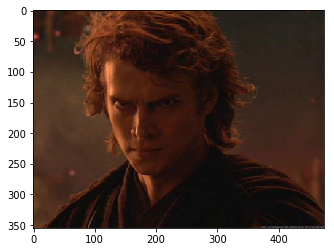

You look like a Wirehaired pointing griffon

Hello human!


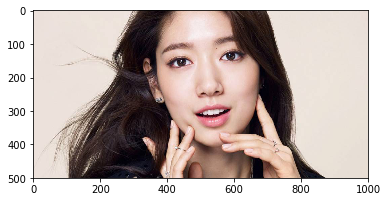

You look like a Nova scotia duck tolling retriever

Hello human!


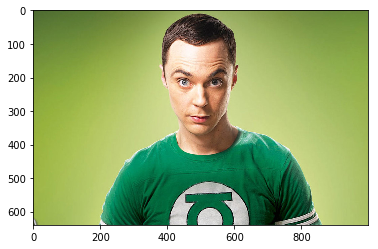

You look like a Dachshund

hello English cocker spaniel


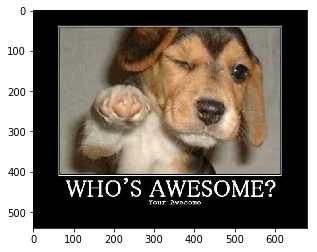


hello Golden retriever


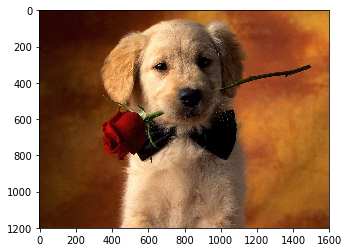


hello Dachshund


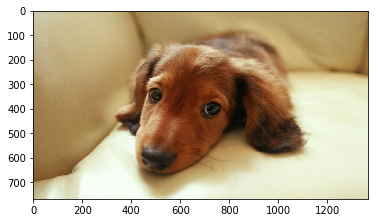

In [42]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from os import listdir
from os.path import isfile, join

human_files = [f"myImages/human/{f}" for f in listdir('myImages/human') if isfile(join('myImages/human', f))]
dog_files = [f"myImages/dog/{f}" for f in listdir('myImages/dog') if isfile(join('myImages/dog', f))]

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    print()
    